In [76]:
import json
import matplotlib.pyplot as plt

summary_score_path = "summary_score.json"
log_history_path = "log_history.json"

with open(summary_score_path,'r') as fp:
    summary_score = json.load(fp)

with open(log_history_path,'r') as fp:
    log_history = json.load(fp)

In [77]:
list(summary_score.keys())

['t5-base',
 'google/mt5-base',
 'google/flan-t5-base',
 'google/t5-v1_1-base',
 'google/t5-efficient-base',
 'google/long-t5-local-base',
 'facebook/bart-base',
 'openai-gpt',
 'google/byt5-base',
 'gpt2-medium',
 'Nicki/gpt3-base',
 'facebook/xglm-564M',
 'ai-forever/mGPT']

In [78]:
list(log_history.keys())

['t5-base',
 'google/mt5-base',
 'google/flan-t5-base',
 'google/t5-v1_1-base',
 'google/t5-efficient-base',
 'google/long-t5-local-base',
 'facebook/bart-base',
 'openai-gpt',
 'google/byt5-base',
 'gpt2-medium',
 'Nicki/gpt3-base',
 'facebook/xglm-564M',
 'ai-forever/mGPT']

# Score Analysis

In [79]:
summary_score["t5-base"]

{'rest15-aos': 0.532981530343008,
 'rest15-cs': 0.6861089792785879,
 'rest16-aos': 0.6246913580246913,
 'rest16-cs': 0.7703703703703704}

In [80]:
# Extract the model names
models = list(summary_score.keys())

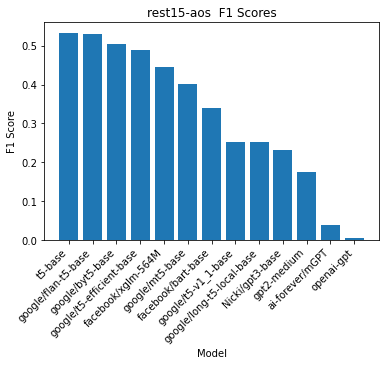

In [81]:
rest15_aos_models = sorted(models, key=lambda x: summary_score[x]['rest15-aos'], reverse=True)

task = "rest15-aos"

plt.bar(rest15_aos_models, [summary_score[model][task] for model in rest15_aos_models])
plt.title(f'{task}  F1 Scores')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')

plt.show()

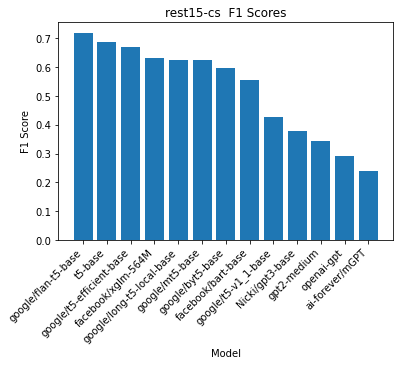

In [82]:
rest15_cs_models = sorted(models, key=lambda x: summary_score[x]['rest15-cs'], reverse=True)

task = "rest15-cs"

plt.bar(rest15_cs_models, [summary_score[model][task] for model in rest15_cs_models])
plt.title(f'{task}  F1 Scores')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')

plt.show()

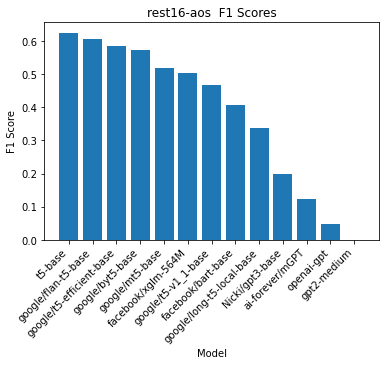

In [83]:
rest16_aos_models = sorted(models, key=lambda x: summary_score[x]['rest16-aos'], reverse=True)

task = "rest16-aos"

plt.bar(rest16_aos_models, [summary_score[model][task] for model in rest16_aos_models])
plt.title(f'{task}  F1 Scores')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')

plt.show()

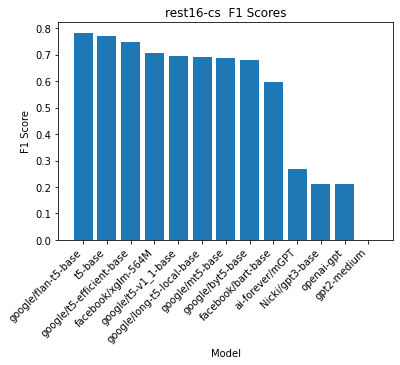

In [84]:
rest16_cs_models = sorted(models, key=lambda x: summary_score[x]['rest16-cs'], reverse=True)

task = "rest16-cs"

plt.bar(rest16_cs_models, [summary_score[model][task] for model in rest16_cs_models])
plt.title(f'{task}  F1 Scores')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')

plt.show()

In [85]:
summary_score["t5-base"]

{'rest15-aos': 0.532981530343008,
 'rest15-cs': 0.6861089792785879,
 'rest16-aos': 0.6246913580246913,
 'rest16-cs': 0.7703703703703704}

In [86]:
summary_score["google/flan-t5-base"]

{'rest15-aos': 0.5309941376574004,
 'rest15-cs': 0.7191011235955057,
 'rest16-aos': 0.6068111455108359,
 'rest16-cs': 0.7822222222222223}

In [87]:
t5_vs_flan_t5 = {}
for key in summary_score["t5-base"].keys():
    t5_vs_flan_t5[key] = summary_score["t5-base"][key] - summary_score["google/flan-t5-base"][key]

In [88]:
t5_vs_flan_t5

{'rest15-aos': 0.0019873926856075474,
 'rest15-cs': -0.03299214431691777,
 'rest16-aos': 0.01788021251385541,
 'rest16-cs': -0.011851851851851891}

Kesimpulan: T5 dan flan T5 cenderung sama, maka komparasi dapat dilakukan dari metriks lain, yang mana yang lebih efisien, apakah waktu training, efisiensi parameter, yang lebih cepat converge, dll

# Log History

In [116]:
def visualize_trough_epoch(model,dataset,metrics_name):
    epochs = []
    metrics = []
    for result in log_history[model][dataset]:
        if metrics_name in result:
            epochs.append(result["epoch"])
            metrics.append(result[metrics_name])

    # Create a line chart of the loss through each epoch
    plt.plot(epochs, metrics, marker='o')
    plt.title(f'{metrics_name} through Epochs {dataset} {model}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

## AOS F1 Score

### Rest15 T5

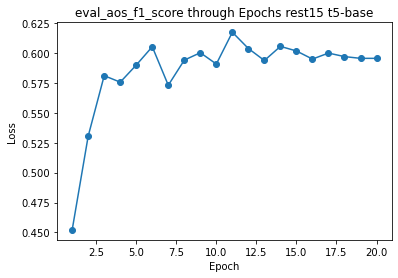

In [120]:
visualize_trough_epoch("t5-base","rest15","eval_aos_f1_score")

Titik Ekstrim: Epoch 11

### Rest16 T5

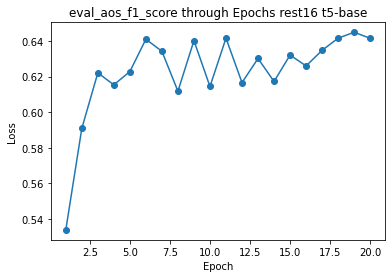

In [121]:
visualize_trough_epoch("t5-base","rest16","eval_aos_f1_score")

Titik Ekstrim: Epoch 19

### Rest15 FlanT5

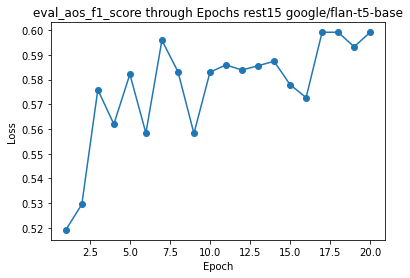

In [122]:
visualize_trough_epoch("google/flan-t5-base","rest15","eval_aos_f1_score")

Titik Ekstrim: epoch 17/20

### Rest16 FlanT5

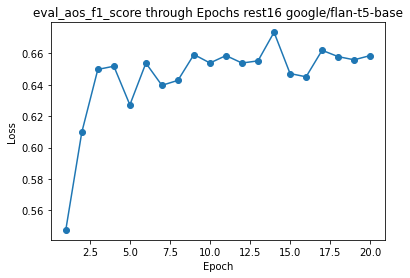

In [123]:
visualize_trough_epoch("google/flan-t5-base","rest16","eval_aos_f1_score")

Titik Ekstrim: 14

# Conclusion

Diambil t5-base saja, karena nilai f1 score tertinggi dan juga converge lebih cepat